In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from asi import path_config

session2 = path_config.measurements / "session2"

# Segmentation: Specium Scanner, GreenSamplesVisible

In [2]:
from asi.draw import reconstruct_rgb_envi
from asi.preprocess import load_white_corrected

specim_iq = session2 / "Specim scanner" / "GreenSamplesVisible" / "capture"

image_path = specim_iq / "solutions_scan_0145"
darkref_path = specim_iq / "DARKREF_solutions_scan_0145"
whiteref_path = specim_iq / "WHITEREF_solutions_scan_0145"

spectral_image, envi_header = load_white_corrected(image_path, whiteref_path, darkref_path)
spectral_image = spectral_image.astype(np.float16)

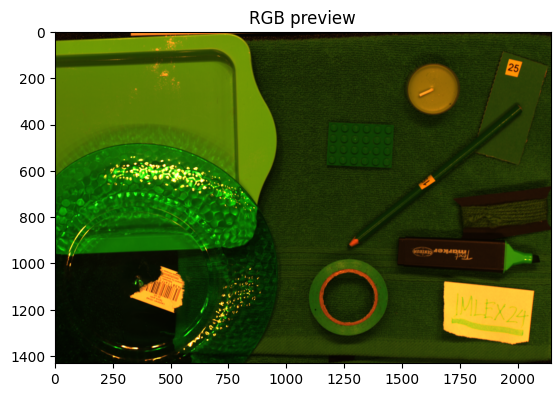

In [3]:
rgb_view = reconstruct_rgb_envi(spectral_image, envi_header)
rgb_view *= 3
rgb_view = rgb_view.clip(0, 1)
plt.imshow(rgb_view)
plt.title("RGB preview")
plt.show()

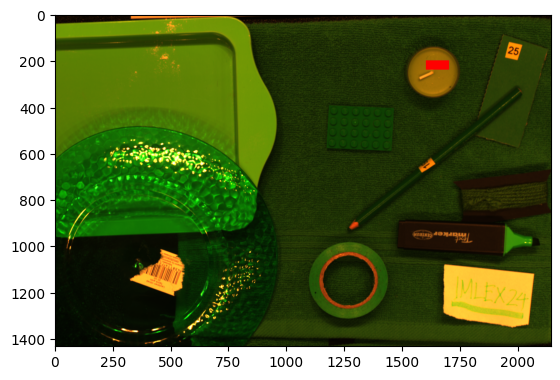

In [4]:
from segmentation import select_area

select_pos = (slice(200, 240), slice(1600, 1700))
r = select_area(rgb_view, select_pos)
plt.imshow(r)

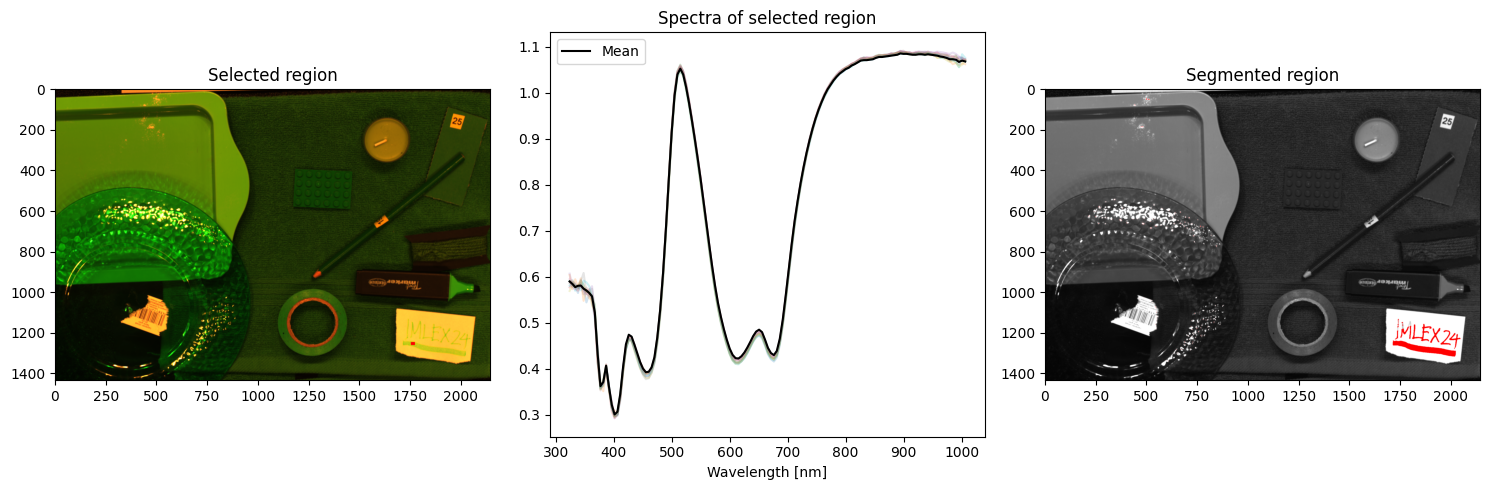

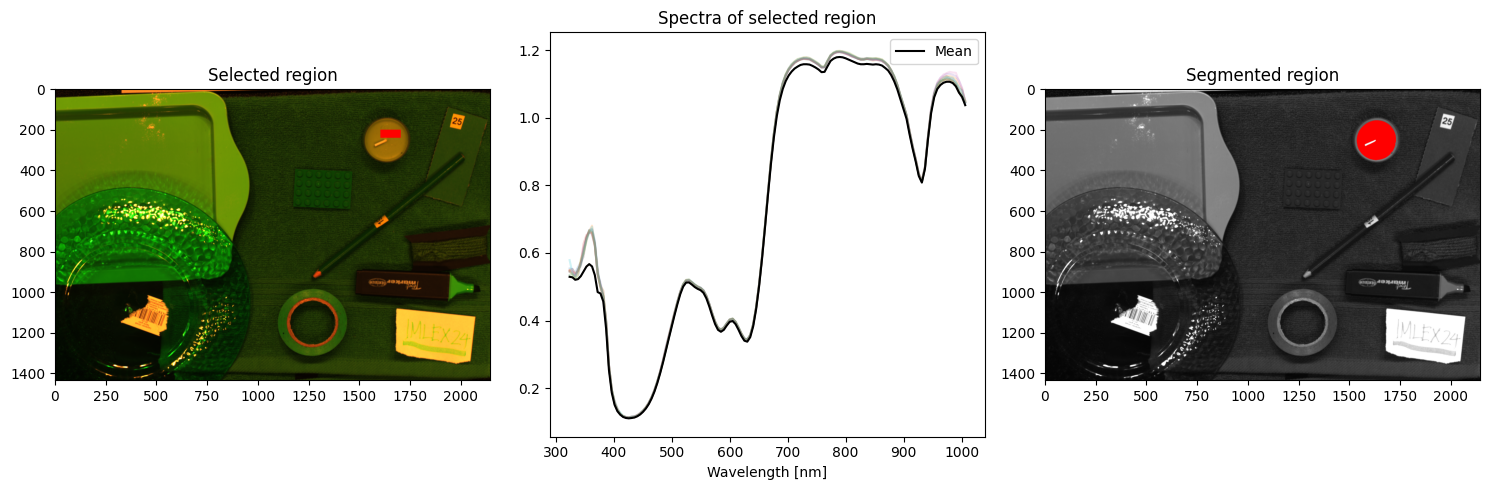

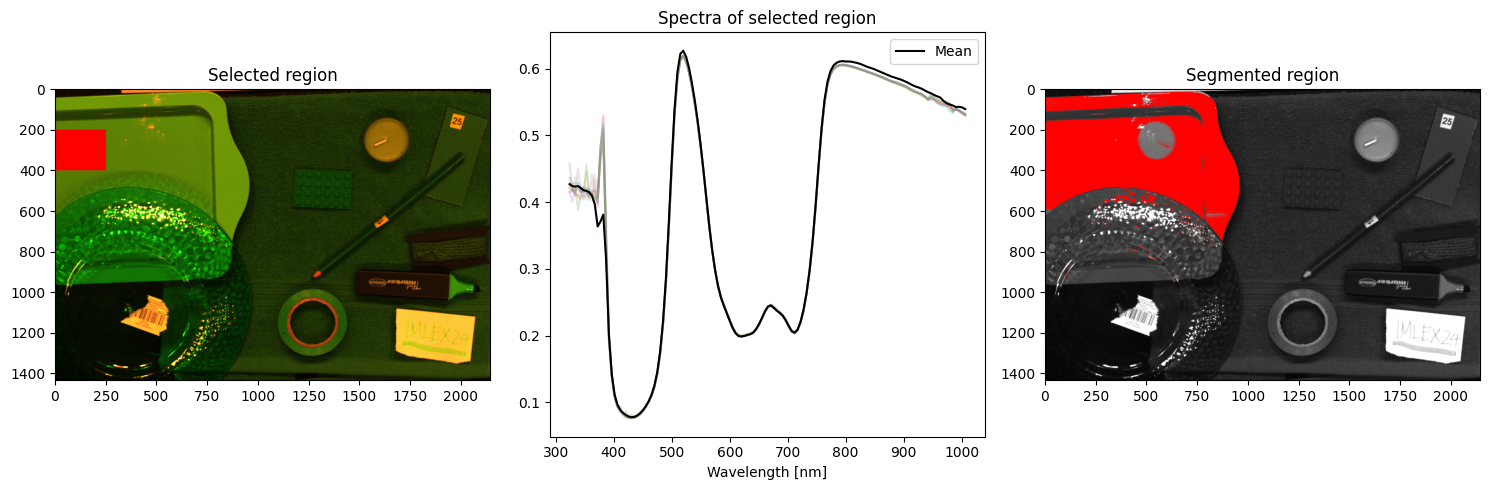

In [5]:
from segmentation import plot_segmentation_results

select_pos = (slice(1245, 1260), slice(1750, 1770))
fig = plot_segmentation_results(spectral_image, envi_header, select_pos, threshold=0.3)
plt.show()
select_pos = (slice(200, 240), slice(1600, 1700))
fig = plot_segmentation_results(spectral_image, envi_header, select_pos, threshold=0.3)
plt.show()
select_pos = (slice(200, 400), slice(0, 250))
fig = plot_segmentation_results(spectral_image, envi_header, select_pos)
plt.show()

In [6]:
# spectral_imageのメモリ使用量を調べる
import sys
print(sys.getsizeof(rgb_view) / 1024 / 1024)


70.27162170410156
